# Import Required Libraries
Import necessary libraries such as NumPy and Matplotlib.

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the Maze
Define the maze as a 2D NumPy array with 'S' for start, 'G' for goal, and integers for paths and walls.

In [3]:
# Define the Maze
maze = np.array([
    ['S', 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 'G']
])

# Convert Maze to Numeric Grid
Create a function to convert the maze into a numeric grid where 'S' becomes 2 and 'G' becomes 3.

In [4]:
# Convert Maze to Numeric Grid
def to_numeric_grid(maze):
    maze = np.array(maze)
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'S':
                maze[i][j] = 2
            elif maze[i][j] == 'G':
                maze[i][j] = 3
            else:
                maze[i][j] = maze[i][j]
    return maze.astype(int)

numeric_maze = to_numeric_grid(maze)
numeric_maze

array([[2, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 3]])

# Find Positions of Start and Goal
Implement a function to find the positions of 'S' and 'G' in the maze.

In [5]:
# Find Positions of Start and Goal
def find_pos(maze, value):
    maze = np.array(maze)
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == value:
                return (i, j)

start_pos = find_pos(maze, 'S')
goal_pos = find_pos(maze, 'G')
print("Start Position:", start_pos)
print("Goal Position:", goal_pos)

Start Position: (0, 0)
Goal Position: (9, 9)


# Visualize the Maze
Use Matplotlib to visualize the maze and mark the start and goal positions.

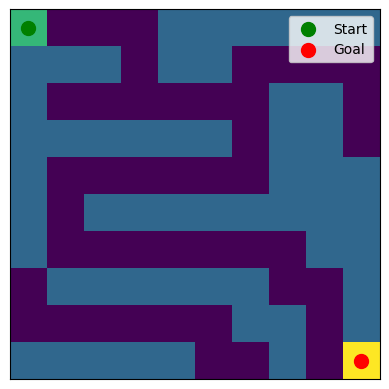

In [6]:
# Visualize the Maze
grid = np.array(numeric_maze)
plt.imshow(grid, cmap='viridis')
start = np.argwhere(grid == 2)
goal = np.argwhere(grid == 3)

for y, x in start:
    plt.scatter(x, y, c='g', s=100, marker='o', label='Start')

for y, x in goal:
    plt.scatter(x, y, c='r', s=100, marker='o', label='Goal')

plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

# Find Neighbors
Define a function to find valid neighboring cells for a given cell in the maze.

In [7]:
# Find Neighbors
ROWS = grid.shape[0] - 1
COLS = grid.shape[1] - 1

def get_neighbours(r, c):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        new_r, new_c = r + dr, c + dc
        if 0 <= new_r <= ROWS and 0 <= new_c <= COLS:
            if grid[new_r][new_c] != 1:  # Exclude walls
                neighbors.append((new_r, new_c))
    return neighbors

print("Neighbors of (9, 9):", get_neighbours(9, 9))

Neighbors of (9, 9): [(9, 8)]


# Breadth-First Search (BFS) Implementation
Implement the BFS algorithm to find a path from the start to the goal in the maze.

In [8]:
# Breadth-First Search (BFS) Implementation
from collections import deque

def bfs(maze, start, goal):
    queue = deque([start])
    visited = set()
    visited.add(start)
    parent = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parent[current]
            return path[::-1]

        for neighbor in get_neighbours(*current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
    return None

start_numeric = find_pos(numeric_maze, 2)
goal_numeric = find_pos(numeric_maze, 3)
path = bfs(numeric_maze, start_numeric, goal_numeric)
print("Path from Start to Goal:", path)

Path from Start to Goal: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9)]


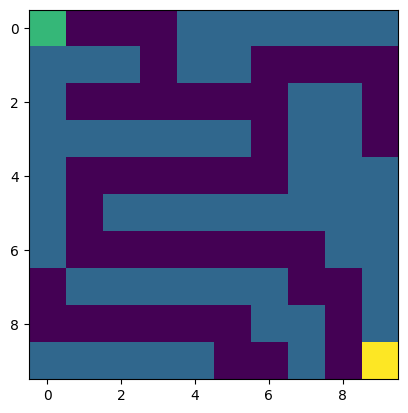

In [13]:
from matplotlib.animation import FuncAnimation

# Animate the path
def animate_path(grid, path):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='viridis')
    
    def update(frame):
        ax.clear()
        ax.imshow(grid, cmap='viridis')
        for i in range(frame + 1):
            y, x = path[i]
            ax.scatter(x, y, c='b', s=100, marker='o')
        ax.scatter(path[0][1], path[0][0], c='g', s=100, marker='o', label='Start')
        ax.scatter(path[-1][1], path[-1][0], c='r', s=100, marker='o', label='Goal')
        ax.legend()
        ax.set_xticks([])
        ax.set_yticks([])
    
    ani = FuncAnimation(fig, update, frames=len(path), interval=10000, repeat=False)
    plt.show()

# Call the animation function
animate_path(numeric_maze, path)